In [ ]:
# imports:)
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet # For more accurate lemmatization

import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [54]:
# Downloading necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aayus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\aayus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aayus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aayus\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [55]:
# loading the dataset!
df = pd.read_csv('jokes-partial.csv')
# Display the first few rows of the DataFrame
print(df.head())


                                                joke
0  [me narrating a documentary about narrators] I...
1  Telling my daughter garlic is good for you. Go...
2  I've been going through a really rough period ...
3  If I could have dinner with anyone, dead or al...
4     Two guys walk into a bar. The third guy ducks.


In [56]:
# 1. initial cleaning of text
# function for initial cleaning of text
def clean_text_initial(text):
    # 1. Lowercasing
    text = text.lower()

    # 2. Remove Punctuation (keep only alphanumeric characters and whitespace)
    # [^...] matches any character NOT in the set. \w matches word characters (alphanumeric + underscore). \s matches whitespace.
    text = re.sub(r'[^\w\s]', '', text)

    # 3. Remove Numbers (digits)
    # \d+ matches one or more digits.
    text = re.sub(r'\d+', '', text)

    # 4. Normalize Whitespace (replace multiple spaces with a single space and strip leading/trailing)
    # \s+ matches one or more whitespace characters.
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# apply the function to the 'joke' column
df['cleaned_joke_initial'] = df['joke'].apply(clean_text_initial)

for i in range(6):
    print(f"Original:   {df['joke'].iloc[i]}")
    print(f"Cleaned:    {df['cleaned_joke_initial'].iloc[i]}\n")

Original:   [me narrating a documentary about narrators] I can't hear what they're saying cuz I'm talking
Cleaned:    me narrating a documentary about narrators i cant hear what theyre saying cuz im talking

Original:   Telling my daughter garlic is good for you. Good immune system and keeps pests away. Ticks, mosquitos, vampires... men
Cleaned:    telling my daughter garlic is good for you good immune system and keeps pests away ticks mosquitos vampires men

Original:   I've been going through a really rough period at work this week It's my own fault for swapping my tampax for sand paper
Cleaned:    ive been going through a really rough period at work this week its my own fault for swapping my tampax for sand paper

Original:   If I could have dinner with anyone, dead or alive... ...I would choose alive. -B.J. Novak
Cleaned:    if i could have dinner with anyone dead or alive i would choose alive bj novak

Original:   Two guys walk into a bar. The third guy ducks.
Cleaned:    two guys

In [57]:
# 2. tokenization
# tokenizing the cleaned jokes using NLTK's word_tokenize
df['tokenized_joke'] = df['cleaned_joke_initial'].apply(word_tokenize)

for i in range(6):
    print(f"Cleaned:    {df['cleaned_joke_initial'].iloc[i]}")
    print(f"Tokenized:  {df['tokenized_joke'].iloc[i]}\n")

Cleaned:    me narrating a documentary about narrators i cant hear what theyre saying cuz im talking
Tokenized:  ['me', 'narrating', 'a', 'documentary', 'about', 'narrators', 'i', 'cant', 'hear', 'what', 'theyre', 'saying', 'cuz', 'im', 'talking']

Cleaned:    telling my daughter garlic is good for you good immune system and keeps pests away ticks mosquitos vampires men
Tokenized:  ['telling', 'my', 'daughter', 'garlic', 'is', 'good', 'for', 'you', 'good', 'immune', 'system', 'and', 'keeps', 'pests', 'away', 'ticks', 'mosquitos', 'vampires', 'men']

Cleaned:    ive been going through a really rough period at work this week its my own fault for swapping my tampax for sand paper
Tokenized:  ['ive', 'been', 'going', 'through', 'a', 'really', 'rough', 'period', 'at', 'work', 'this', 'week', 'its', 'my', 'own', 'fault', 'for', 'swapping', 'my', 'tampax', 'for', 'sand', 'paper']

Cleaned:    if i could have dinner with anyone dead or alive i would choose alive bj novak
Tokenized:  ['if', 'i'

In [58]:
# 3. removing stop words from the tokenized jokes

# get stopwrords from NLTK
stop_words = set(stopwords.words('english'))

# function to reomve stop words
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# apply the function to the 'tokenized_joke' column
df['stopwords_removed'] = df['tokenized_joke'].apply(remove_stopwords)

for i in range(6):
    print(f"Tokenized:  {df['tokenized_joke'].iloc[i]}")
    print(f"Stopwords Removed: {df['stopwords_removed'].iloc[i]}\n")

Tokenized:  ['me', 'narrating', 'a', 'documentary', 'about', 'narrators', 'i', 'cant', 'hear', 'what', 'theyre', 'saying', 'cuz', 'im', 'talking']
Stopwords Removed: ['narrating', 'documentary', 'narrators', 'cant', 'hear', 'theyre', 'saying', 'cuz', 'im', 'talking']

Tokenized:  ['telling', 'my', 'daughter', 'garlic', 'is', 'good', 'for', 'you', 'good', 'immune', 'system', 'and', 'keeps', 'pests', 'away', 'ticks', 'mosquitos', 'vampires', 'men']
Stopwords Removed: ['telling', 'daughter', 'garlic', 'good', 'good', 'immune', 'system', 'keeps', 'pests', 'away', 'ticks', 'mosquitos', 'vampires', 'men']

Tokenized:  ['ive', 'been', 'going', 'through', 'a', 'really', 'rough', 'period', 'at', 'work', 'this', 'week', 'its', 'my', 'own', 'fault', 'for', 'swapping', 'my', 'tampax', 'for', 'sand', 'paper']
Stopwords Removed: ['ive', 'going', 'really', 'rough', 'period', 'work', 'week', 'fault', 'swapping', 'tampax', 'sand', 'paper']

Tokenized:  ['if', 'i', 'could', 'have', 'dinner', 'with', 'an

In [59]:
# 4. normalization a. Stemming

# stemming function from nltk
porter_stemmer = PorterStemmer()

def apply_stemming(tokens):
    return [porter_stemmer.stem(word) for word in tokens]

df['stemmed_joke'] = df['stopwords_removed'].apply(apply_stemming)

for i in range(6):
    print(f"Stopwords Removed: {df['stopwords_removed'].iloc[i]}")
    print(f"Stemmed: {df['stemmed_joke'].iloc[i]}\n")

Stopwords Removed: ['narrating', 'documentary', 'narrators', 'cant', 'hear', 'theyre', 'saying', 'cuz', 'im', 'talking']
Stemmed: ['narrat', 'documentari', 'narrat', 'cant', 'hear', 'theyr', 'say', 'cuz', 'im', 'talk']

Stopwords Removed: ['telling', 'daughter', 'garlic', 'good', 'good', 'immune', 'system', 'keeps', 'pests', 'away', 'ticks', 'mosquitos', 'vampires', 'men']
Stemmed: ['tell', 'daughter', 'garlic', 'good', 'good', 'immun', 'system', 'keep', 'pest', 'away', 'tick', 'mosquito', 'vampir', 'men']

Stopwords Removed: ['ive', 'going', 'really', 'rough', 'period', 'work', 'week', 'fault', 'swapping', 'tampax', 'sand', 'paper']
Stemmed: ['ive', 'go', 'realli', 'rough', 'period', 'work', 'week', 'fault', 'swap', 'tampax', 'sand', 'paper']

Stopwords Removed: ['could', 'dinner', 'anyone', 'dead', 'alive', 'would', 'choose', 'alive', 'bj', 'novak']
Stemmed: ['could', 'dinner', 'anyon', 'dead', 'aliv', 'would', 'choos', 'aliv', 'bj', 'novak']

Stopwords Removed: ['two', 'guys', 'walk

In [60]:
# 4. normalization b. Lemmatization with POS tagging
# lemmatization function from nltk
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    """Converts treebank tags to wordnet tags."""
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if no match found
    
def apply_lemmatization(tokens):
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]

df['pos_lemmatized_joke'] = df['stopwords_removed'].apply(apply_lemmatization)

for i in range(6):
    print(f"Stopwords Removed: {df['stopwords_removed'].iloc[i]}")
    print(f"POS Lemmatized: {df['pos_lemmatized_joke'].iloc[i]}\n")    

Stopwords Removed: ['narrating', 'documentary', 'narrators', 'cant', 'hear', 'theyre', 'saying', 'cuz', 'im', 'talking']
POS Lemmatized: ['narrating', 'documentary', 'narrator', 'cant', 'hear', 'theyre', 'saying', 'cuz', 'im', 'talking']

Stopwords Removed: ['telling', 'daughter', 'garlic', 'good', 'good', 'immune', 'system', 'keeps', 'pests', 'away', 'ticks', 'mosquitos', 'vampires', 'men']
POS Lemmatized: ['telling', 'daughter', 'garlic', 'good', 'good', 'immune', 'system', 'keep', 'pest', 'away', 'tick', 'mosquito', 'vampire', 'men']

Stopwords Removed: ['ive', 'going', 'really', 'rough', 'period', 'work', 'week', 'fault', 'swapping', 'tampax', 'sand', 'paper']
POS Lemmatized: ['ive', 'going', 'really', 'rough', 'period', 'work', 'week', 'fault', 'swapping', 'tampax', 'sand', 'paper']

Stopwords Removed: ['could', 'dinner', 'anyone', 'dead', 'alive', 'would', 'choose', 'alive', 'bj', 'novak']
POS Lemmatized: ['could', 'dinner', 'anyone', 'dead', 'alive', 'would', 'choose', 'alive', 

In [61]:
# 4. normalization b. Lemmatization without POS tagging
# lemmatization function from nltk
lemmatizer = WordNetLemmatizer()

def apply_lemmatization(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df['lemmatized_joke'] = df['stopwords_removed'].apply(apply_lemmatization)

for i in range(6):
    print(f"Stopwords Removed: {df['stopwords_removed'].iloc[i]}")
    print(f"Lemmatized: {df['lemmatized_joke'].iloc[i]}\n")    

Stopwords Removed: ['narrating', 'documentary', 'narrators', 'cant', 'hear', 'theyre', 'saying', 'cuz', 'im', 'talking']
Lemmatized: ['narrating', 'documentary', 'narrator', 'cant', 'hear', 'theyre', 'saying', 'cuz', 'im', 'talking']

Stopwords Removed: ['telling', 'daughter', 'garlic', 'good', 'good', 'immune', 'system', 'keeps', 'pests', 'away', 'ticks', 'mosquitos', 'vampires', 'men']
Lemmatized: ['telling', 'daughter', 'garlic', 'good', 'good', 'immune', 'system', 'keep', 'pest', 'away', 'tick', 'mosquito', 'vampire', 'men']

Stopwords Removed: ['ive', 'going', 'really', 'rough', 'period', 'work', 'week', 'fault', 'swapping', 'tampax', 'sand', 'paper']
Lemmatized: ['ive', 'going', 'really', 'rough', 'period', 'work', 'week', 'fault', 'swapping', 'tampax', 'sand', 'paper']

Stopwords Removed: ['could', 'dinner', 'anyone', 'dead', 'alive', 'would', 'choose', 'alive', 'bj', 'novak']
Lemmatized: ['could', 'dinner', 'anyone', 'dead', 'alive', 'would', 'choose', 'alive', 'bj', 'novak']



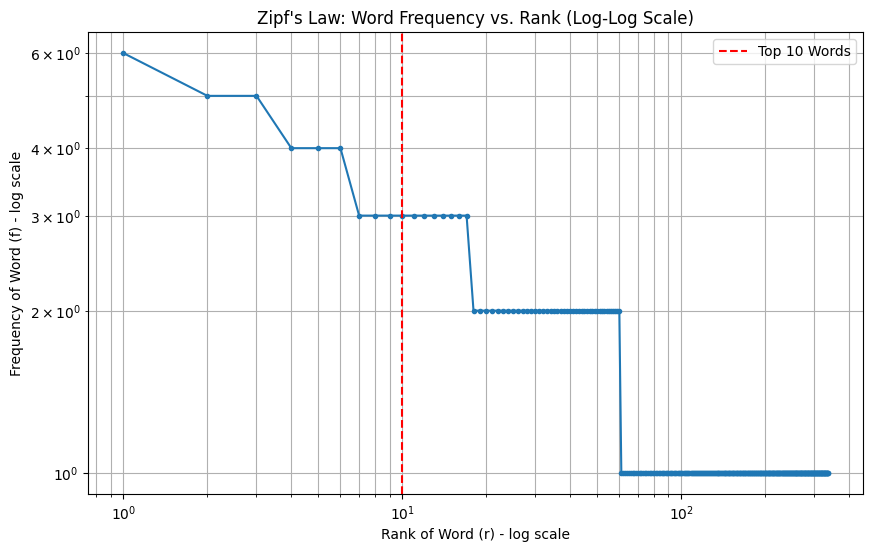


--- Top 10 Most Frequent Lemmatized Words ---
Rank 1: 'get' (Frequency: 6)
Rank 2: 'guy' (Frequency: 5)
Rank 3: 'whats' (Frequency: 5)
Rank 4: 'good' (Frequency: 4)
Rank 5: 'difference' (Frequency: 4)
Rank 6: 'one' (Frequency: 4)
Rank 7: 'cant' (Frequency: 3)
Rank 8: 'hear' (Frequency: 3)
Rank 9: 'ive' (Frequency: 3)
Rank 10: 'dont' (Frequency: 3)

--- Zipf's Law: Frequency * Rank for Top 5 ---
Rank 1: 'get' (Freq: 6) -> Freq * Rank: 6
Rank 2: 'guy' (Freq: 5) -> Freq * Rank: 10
Rank 3: 'whats' (Freq: 5) -> Freq * Rank: 15
Rank 4: 'good' (Freq: 4) -> Freq * Rank: 16
Rank 5: 'difference' (Freq: 4) -> Freq * Rank: 20


In [62]:
# Zipf's law demo check
all_lemmas = [word for sublist in df['lemmatized_joke'] for word in sublist]
# Get word frequencies
word_counts = Counter(all_lemmas)
# Sort words by frequency in descending order
sorted_word_counts = word_counts.most_common()

# Extract frequencies and ranks
frequencies = [count for word, count in sorted_word_counts]
ranks = list(range(1, len(frequencies) + 1))

# Check for empty lists to avoid log(0) errors
if not frequencies:
    print("No words found after preprocessing. Cannot calculate Zipf's Law.")
else:
    # Plotting for Zipf's Law
    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, frequencies, marker='.', linestyle='-')
    plt.title("Zipf's Law: Word Frequency vs. Rank (Log-Log Scale)")
    plt.xlabel("Rank of Word (r) - log scale")
    plt.ylabel("Frequency of Word (f) - log scale")
    plt.grid(True, which="both", ls="-")
    plt.axvline(x=10, color='r', linestyle='--', label='Top 10 Words') # Highlight top few words
    plt.legend()
    plt.show()

    print("\n--- Top 10 Most Frequent Lemmatized Words ---")
    for i, (word, count) in enumerate(sorted_word_counts[:10]):
        print(f"Rank {i+1}: '{word}' (Frequency: {count})")

    # A quick check for the Zipfian relationship: f(r) * r should be roughly constant
    print("\n--- Zipf's Law: Frequency * Rank for Top 5 ---")
    for i in range(min(5, len(frequencies))):
        rank = ranks[i]
        freq = frequencies[i]
        if rank > 0: # Avoid division by zero
            print(f"Rank {rank}: '{sorted_word_counts[i][0]}' (Freq: {freq}) -> Freq * Rank: {freq * rank}")


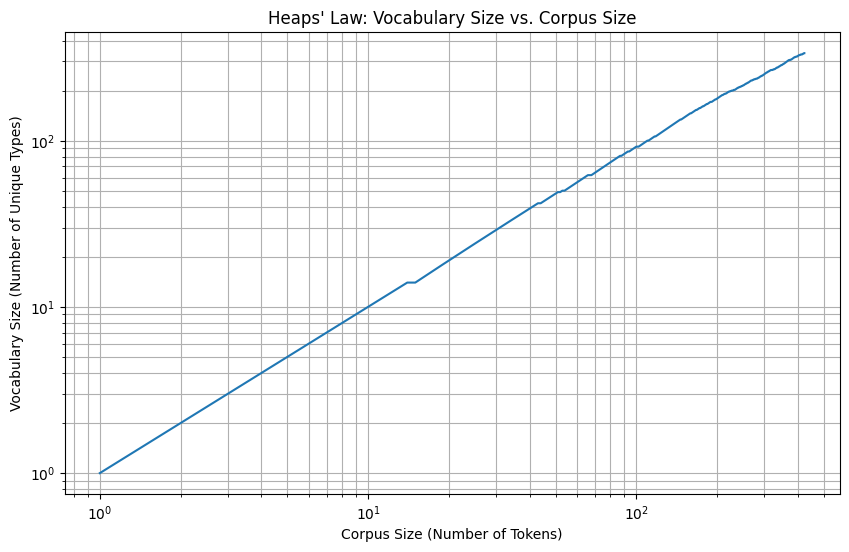


--- Heaps' Law Observations ---
Initial 100 tokens: 92 unique types
Final 423 tokens: 336 unique types


In [63]:
# Heaps law demo check
cumulative_tokens = []
cumulative_types = []
seen_types = set()
token_count = 0

for joke_tokens in df['lemmatized_joke']:
    for token in joke_tokens:
        token_count += 1
        seen_types.add(token)
        cumulative_tokens.append(token_count)
        cumulative_types.append(len(seen_types))

# Plotting for Heaps' Law
if not cumulative_tokens:
    print("No tokens found. Cannot calculate Heaps' Law.")
else:
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_tokens, cumulative_types)
    plt.title("Heaps' Law: Vocabulary Size vs. Corpus Size")
    plt.xlabel("Corpus Size (Number of Tokens)")
    plt.ylabel("Vocabulary Size (Number of Unique Types)")
    plt.grid(True, which="both", ls="-")
    plt.xscale('log') # Log scale for x-axis to better show the sub-linear growth
    plt.yscale('log') # Log scale for y-axis
    plt.show()

    # You can also try to fit the curve to estimate K and beta, but that's more advanced
    # For now, just observing the curve is sufficient for understanding.

print("\n--- Heaps' Law Observations ---")
print(f"Initial 100 tokens: {cumulative_types[min(99, len(cumulative_types) - 1)]} unique types")
print(f"Final {cumulative_tokens[-1]} tokens: {cumulative_types[-1]} unique types")